In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from art.attacks.evasion import ProjectedGradientDescent
from art.estimators.classification import KerasClassifier
from scipy.io import arff

In [2]:
def mlp_model(X, Y):
    
    model = Sequential()
    model.add(Dense(units = round(X.shape[1]/2), kernel_initializer =  'uniform', activation = 'relu', input_dim = X.shape[1]))
    model.add(Dense(units = round(X.shape[1]/2), kernel_initializer =  'uniform', activation = 'relu'))
    
    if(len(np.unique(Y)) > 2): 
        model.add(Dense(units = len(np.unique(Y)), kernel_initializer =  'uniform', activation = 'softmax'))
        model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    else: 
        model.add(Dense(units = 1, kernel_initializer =  'uniform', activation = 'sigmoid'))
        model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    print(model.summary())
    
    return model

In [3]:
def mlp_model_train(X, Y, val_split, batch_size, epochs_count, model):
    callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

    history = model.fit(X, Y,
                   callbacks=callbacks,
                   validation_split=val_split,
                   batch_size = batch_size,
                   epochs = epochs_count,
                   shuffle=True)

    print(history.history)
    print(model.summary())
    return history


In [4]:
def mlp_model_eval(X, Y, history, flag, model):
    Y_pred = model.predict(X)
    Y_pred = (Y_pred > 0.5)

    print(classification_report(Y, Y_pred, digits=4))

    cm = confusion_matrix(Y, Y_pred)
    print("Confusion Matrix:\n", cm)
    print("Accuracy: ", accuracy_score(Y, Y_pred))

    if(len(np.unique(Y))) == 2:
        print("F1: ", f1_score(Y, Y_pred, average='binary'))
        print("Precison: ", precision_score(Y, Y_pred, average='binary'))
        print("Recall: ", recall_score(Y, Y_pred, average='binary'))
    else:
        f1_scores = f1_score(Y, Y_pred, average=None)
        print("F1: ", np.mean(f1_scores))
        precision_scores = precision_score(Y, Y_pred, average=None)
        print("Precison: ", np.mean(precision_scores))
        recall_scores = recall_score(Y, Y_pred, average=None)
        print("Recall: ", np.mean(recall_scores))

    myFig = plt.figure(figsize=[12,10])

    plt.plot(history.history['accuracy'], linestyle = ':',lw = 2, alpha=0.8, color = 'black')
    plt.plot(history.history['val_accuracy'], linestyle = '--',lw = 2, alpha=0.8, color = 'black')
    plt.title('Accuracy over Epoch', fontsize=20, weight='bold')
    plt.ylabel('Accuracy', fontsize=18, weight='bold')
    plt.xlabel('Epoch', fontsize=18, weight='bold')
    plt.legend(['Train', 'Validation'], loc='lower right', fontsize=14)
    plt.xticks(ticks=range(0, len(history.history['accuracy'])))
    
    plt.yticks(fontsize=16)
    plt.show()
        
    if(len(np.unique(Y))) == 2:
        if(flag == 1): 
            fileName = 'ANN_Accuracy_over_Epoch_Binary_Classification_TRAbIDRegular.eps'
        else: 
            fileName = 'ANN_Accuracy_over_Epoch_Binary_Classification_TRAbID_Adversarial.eps'
    else:
        if(flag == 1): 
            fileName = 'ANN_Accuracy_over_Epoch_Multiclass_Classification_TRAbID_Regular.eps'
        else: 
            fileName = 'ANN_Accuracy_over_Epoch_Multiclass_Classification_TRAbID_Adversarial.eps'
    
    myFig.savefig(fileName, format='eps', dpi=1200)
    
    plt.clf()
    myFig = plt.figure(figsize=[12,10])
    
    plt.plot(history.history['loss'], linestyle = ':',lw = 2, alpha=0.8, color = 'black')
    plt.plot(history.history['val_loss'], linestyle = '--',lw = 2, alpha=0.8, color = 'black')
    plt.title('Loss over Epoch', fontsize=20, weight='bold')
    plt.ylabel('Loss', fontsize=18, weight='bold')
    plt.xlabel('Epoch', fontsize=18, weight='bold')
    plt.legend(['Train', 'Validation'], loc='upper right', fontsize=14)
    plt.xticks(ticks=range(0, len(history.history['loss'])))
    
    plt.yticks(fontsize=16)
    plt.show()
        
    if(len(np.unique(Y))) == 2:
        if(flag == 1): 
            fileName = 'ANN_Loss_over_Epoch_Binary_Classification_TRAbID_Regular.eps'
        else: 
            fileName = 'ANN_Loss_over_Epoch_Binary_Classification_TRAbID_Adversarial.eps'
    else:
        if(flag == 1): 
            fileName = 'ANN_Loss_over_Epoch_Multiclass_Classification_TRAbID_Regular.eps'
        else: 
            fileName = 'ANN_Loss_over_Epoch_Multiclass_Classification_TRAbID_Adversarial.eps'
    
    myFig.savefig(fileName, format='eps', dpi=1200)

In [5]:
data = arff.loadarff('TRAbID2017_dataset.arff')
dataset = pd.DataFrame(data[0])
print(dataset.head())
print(dataset.shape)

# Creating X and Y from the dataset
X = dataset.iloc[:, 0:43].values
Y_class = pd.read_csv('TRAbID2017_dataset_Y_class.csv')
Y_class = Y_class.iloc[:, :].values

# Performing scale data
scaler = MinMaxScaler().fit(X)
X_scaled = np.array(scaler.transform(X))

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_class, test_size=0.2, random_state=42, stratify=Y_class)

print("Data Processing has been performed.")

     ip_len     ip_id  ip_DF  ip_proto  ip_checksum  udp_sport  udp_dport  \
0 -0.991781  0.725856   -1.0    -0.375    -0.614487       -1.0       -1.0   
1 -0.983562 -0.903838    1.0    -0.375     0.345024       -1.0       -1.0   
2 -0.991781 -0.331533   -1.0    -0.375     0.458724       -1.0       -1.0   
3 -0.983562 -0.232197    1.0    -0.375    -0.325794       -1.0       -1.0   
4 -0.991781 -0.279805   -1.0    -0.375     0.336630       -1.0       -1.0   

   udp_len  udp_chk  icmp_type  ...  num_fin_dst_src  num_ack_src_dst  \
0     -1.0     -1.0       -1.0  ...        -1.000000        -1.000000   
1     -1.0     -1.0       -1.0  ...        -0.999954        -0.983809   
2     -1.0     -1.0       -1.0  ...        -1.000000        -0.999970   
3     -1.0     -1.0       -1.0  ...        -0.999969        -0.977915   
4     -1.0     -1.0       -1.0  ...        -1.000000        -0.999970   

   num_ack_dst_src  num_syn_src_dst  num_syn_dst_src  num_rst_src_dst  \
0        -0.999879       

In [6]:
# Train the model
model = mlp_model(X, Y_class)
history = mlp_model_train(X_train, Y_train, 0.1, 64, 100, model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                968       
                                                                 
 dense_1 (Dense)             (None, 22)                506       
                                                                 
 dense_2 (Dense)             (None, 1)                 23        
                                                                 
Total params: 1497 (5.85 KB)
Trainable params: 1497 (5.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
207/207 [==============================] - 0s 759us/step - loss: 0.4021 - accuracy: 0.9188 - val_loss: 0.0579 - val_accuracy: 0.9905
Epoch 2/100
207/207 [==============================] - 0s 453us/step - loss: 0.0353 - accuracy: 0.9938 - val_loss: 0.0282 - val_accuracy: 

115/115 [==============================] - 0s 235us/step
              precision    recall  f1-score   support

           0     0.9973    0.9978    0.9975      1832
           1     0.9978    0.9973    0.9975      1831

    accuracy                         0.9975      3663
   macro avg     0.9975    0.9975    0.9975      3663
weighted avg     0.9975    0.9975    0.9975      3663

Confusion Matrix:
 [[1828    4]
 [   5 1826]]
Accuracy:  0.9975429975429976
F1:  0.9975416552854411
Precison:  0.9978142076502732
Recall:  0.9972692517749864


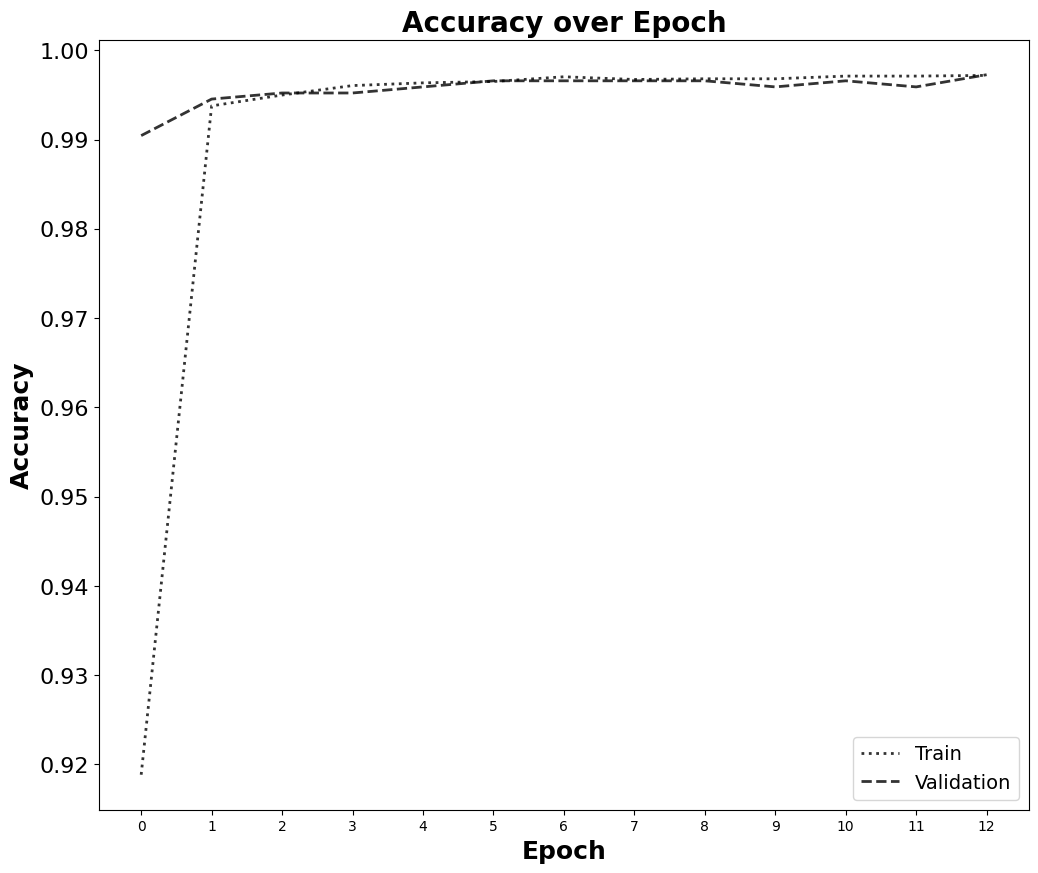

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

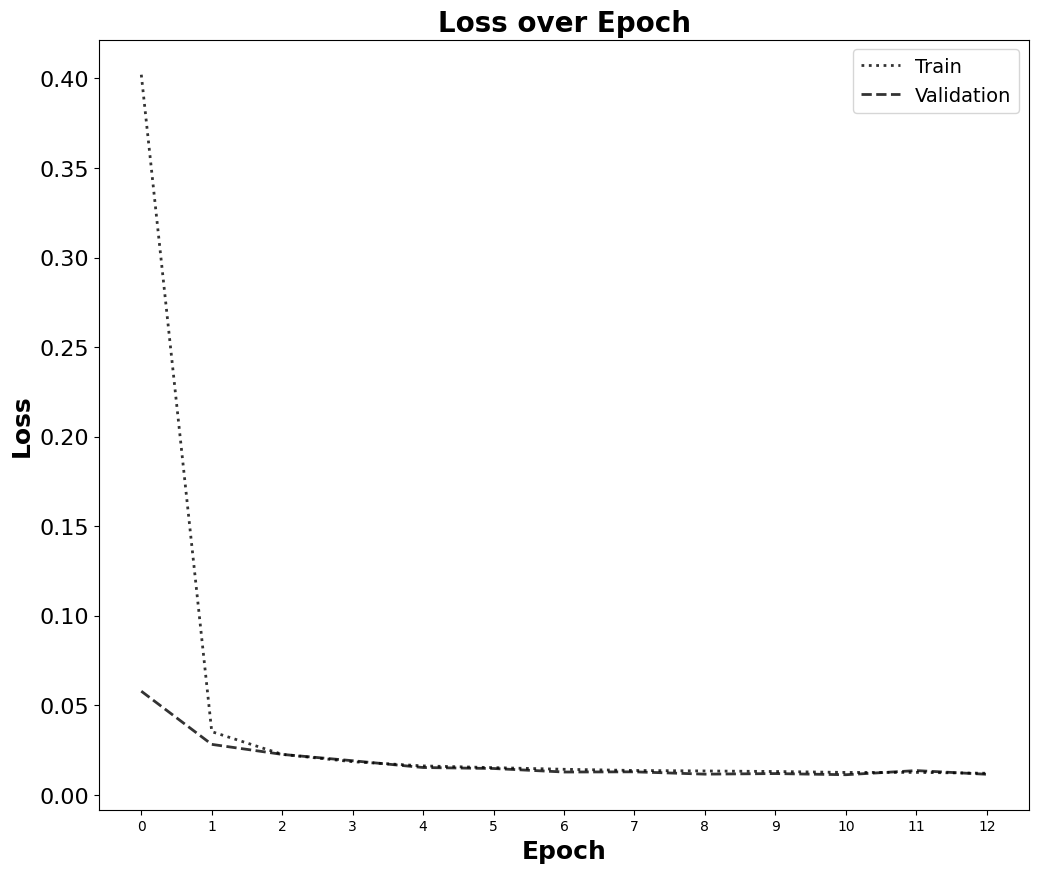

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
mlp_model_eval(X_test, Y_test, history, 1, model)

In [8]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()
print("Eager execution:", tf.executing_eagerly())

Eager execution: False


In [9]:
tf.compat.v1.disable_eager_execution()

In [10]:
model = mlp_model(X, Y_class)
classifier = KerasClassifier(model = model)
pgd_attack = ProjectedGradientDescent(classifier, eps=0.3, eps_step=0.1, max_iter=40)
X_adv = pgd_attack.generate(X_train)
X_adv_test = pgd_attack.generate(X_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 22)                968       
                                                                 
 dense_4 (Dense)             (None, 22)                506       
                                                                 
 dense_5 (Dense)             (None, 1)                 23        
                                                                 
Total params: 1497 (5.85 KB)
Trainable params: 1497 (5.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/Users/dipenshu/Desktop/Work/Qriocity/C192/testenv/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-12-07 00:35:47.301286: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-12-07 00:35:47.306503: W tensorflow/c/c_api.cc:305] Operation '{name:'count/Assign' id:84 op device:{requested: '', assigned: ''} def:{{{node count/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count, count/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


None


PGD - Random Initializations: 100%|██████████| 1/1 [00:00<00:00, 97.35it/s]


In [11]:
mlp_model_train(X_adv, Y_train, 0.1, 64, 100, model)

Train on 13185 samples, validate on 1466 samples


2024-12-07 00:35:55.675297: W tensorflow/c/c_api.cc:305] Operation '{name:'loss/mul' id:131 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_5_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/100


2024-12-07 00:35:55.686444: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense_5/bias/m/Assign' id:362 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_5/bias/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_5/bias/m, training/Adam/dense_5/bias/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


11648/13185 [=========================>....] - ETA: 0s - loss: 0.4562 - accuracy: 0.8450

/Users/dipenshu/Desktop/Work/Qriocity/C192/testenv/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2024-12-07 00:35:55.787916: W tensorflow/c/c_api.cc:305] Operation '{name:'loss/mul' id:131 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_5_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


13185/13185 [==============================] - 0s 8us/sample - loss: 0.4179 - accuracy: 0.8588 - val_loss: 0.1112 - val_accuracy: 0.9727
Epoch 2/100
13185/13185 [==============================] - 0s 5us/sample - loss: 0.0816 - accuracy: 0.9802 - val_loss: 0.0634 - val_accuracy: 0.9864
Epoch 3/100
13185/13185 [==============================] - 0s 5us/sample - loss: 0.0596 - accuracy: 0.9847 - val_loss: 0.0548 - val_accuracy: 0.9891
Epoch 4/100
13185/13185 [==============================] - 0s 6us/sample - loss: 0.0535 - accuracy: 0.9854 - val_loss: 0.0512 - val_accuracy: 0.9898
Epoch 5/100
13185/13185 [==============================] - 0s 5us/sample - loss: 0.0497 - accuracy: 0.9862 - val_loss: 0.0510 - val_accuracy: 0.9884
Epoch 6/100
13185/13185 [==============================] - 0s 5us/sample - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0486 - val_accuracy: 0.9891
Epoch 7/100
13185/13185 [==============================] - 0s 5us/sample - loss: 0.0451 - accuracy: 0.9874 - val_loss:

              precision    recall  f1-score   support

           0     0.9945    0.9902    0.9923      1832
           1     0.9902    0.9945    0.9924      1831

    accuracy                         0.9924      3663
   macro avg     0.9924    0.9924    0.9924      3663
weighted avg     0.9924    0.9924    0.9924      3663

Confusion Matrix:
 [[1814   18]
 [  10 1821]]
Accuracy:  0.9923559923559924
F1:  0.9923705722070845
Precison:  0.9902120717781403
Recall:  0.9945385035499726


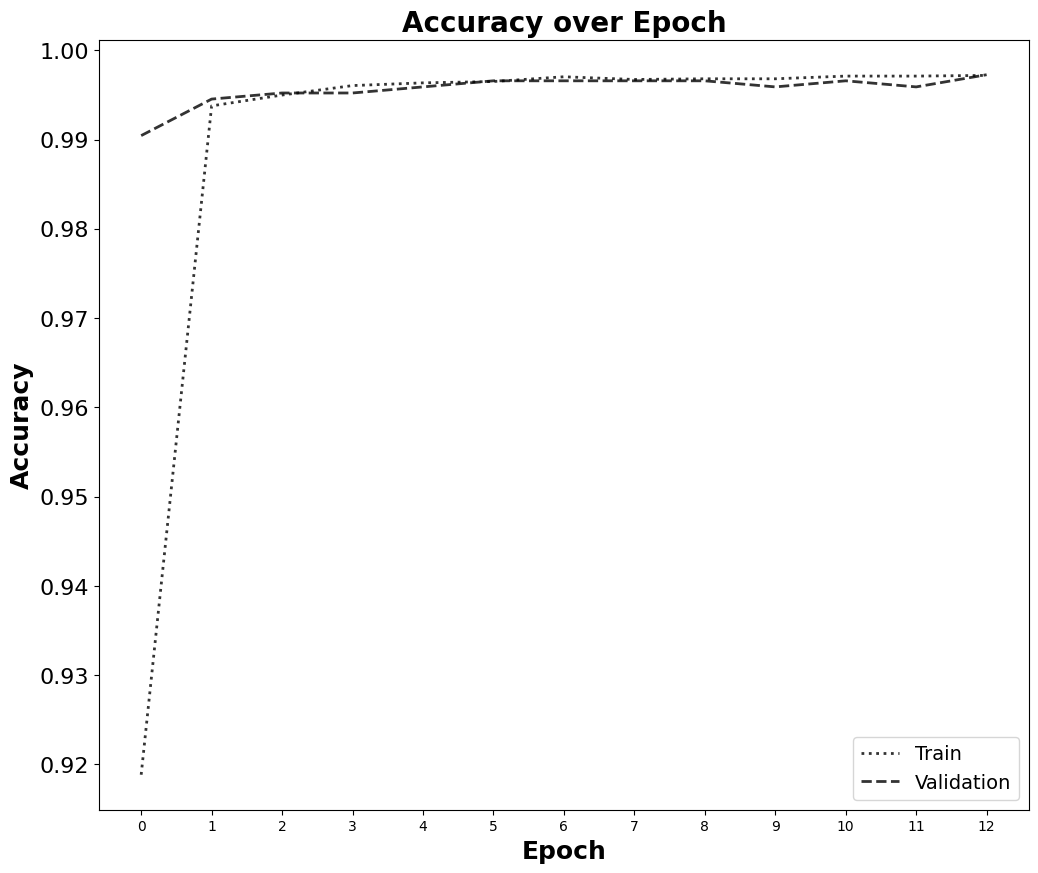

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

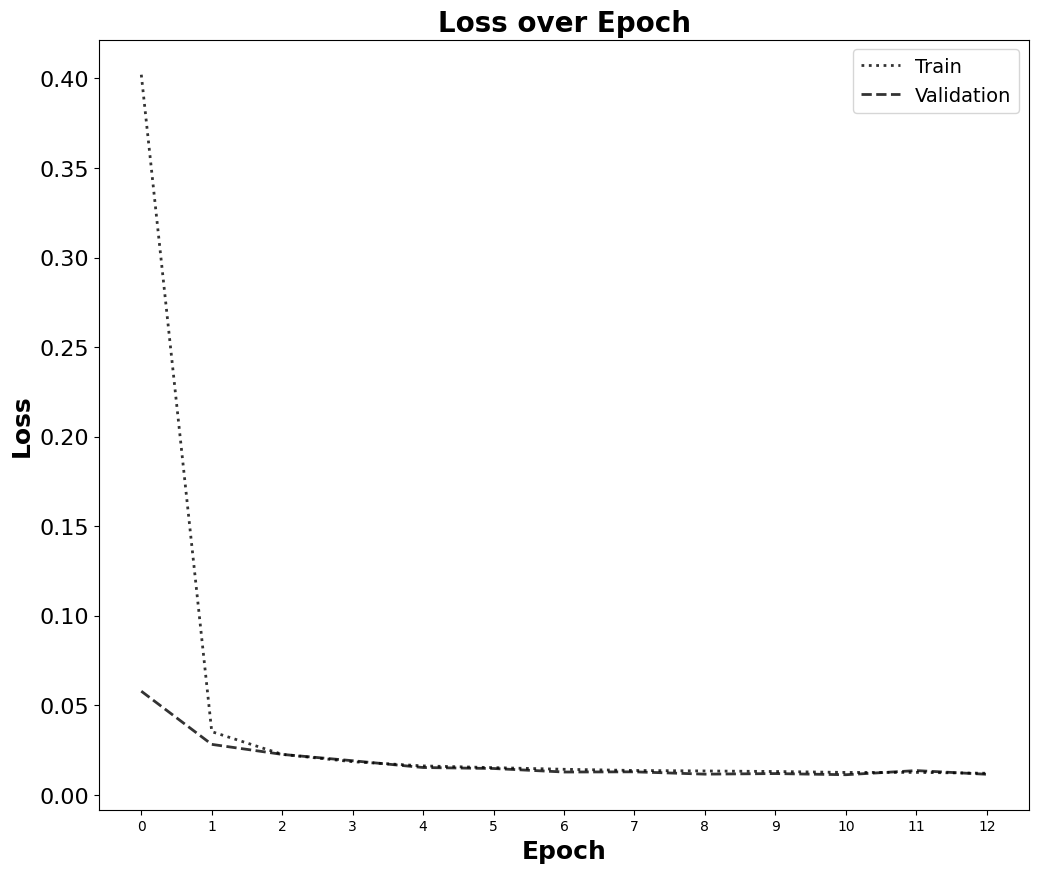

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [12]:
mlp_model_eval(X_adv_test, Y_test, history, 2, model)

In [32]:
import random, pickle

test_label = []
for i in range(5):
    idx = random.randint(0, len(X_adv_test)-1)
    test = pd.DataFrame([X_adv_test[idx].flatten()])
    test_label.append(Y_test[idx][0])
    test.to_csv(f"test{i}.csv")

with open('labels.pkl', 'wb') as f:
    pickle.dump(test_label, f)

In [ ]:
model.save('model.h5')